In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
df=sns.load_dataset("flights")

In [4]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df["YearMonth"]=pd.to_datetime("01-"+df["month"].astype(str)+"-"+df["year"].astype(str))

In [6]:
df.head()

,year,month,passengers,YearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   YearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [8]:
df.set_index("YearMonth",inplace=True)

In [9]:
df.head()

,year,month,passengers
YearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [10]:
df.drop(["year","month"],axis=1,inplace=True)

<AxesSubplot: xlabel='YearMonth'>

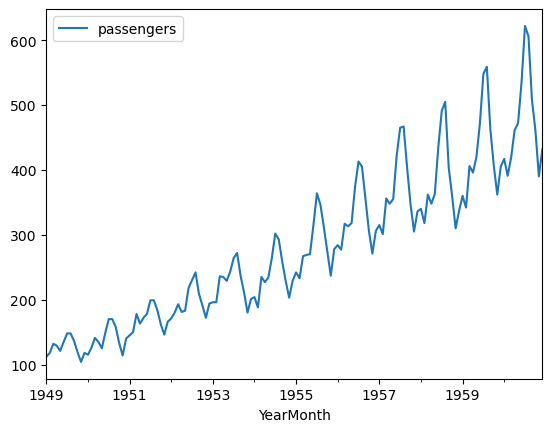

In [11]:
df.plot() ## x axis is repesents the date data and the y axis is represents the passengers data

## HOW TO CHECK THE DATA IS STATIONARY OR NOT

In [12]:
df["rollMean"]=df["passengers"].rolling(window=12).mean()
df["rollstd"]=df["passengers"].rolling(window=12).std()

<AxesSubplot: xlabel='YearMonth'>

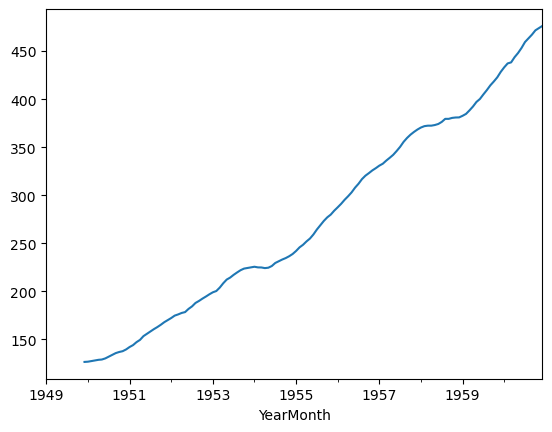

In [13]:
df["rollMean"].plot()

<AxesSubplot: xlabel='YearMonth'>

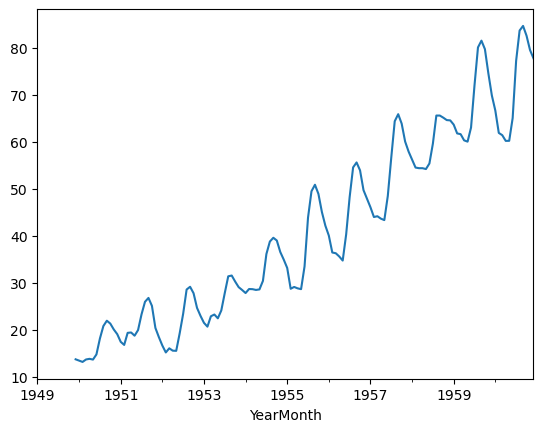

In [14]:
df["rollstd"].plot()

In [15]:
plt.figure(figsize=(15,4))


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<AxesSubplot: xlabel='YearMonth'>

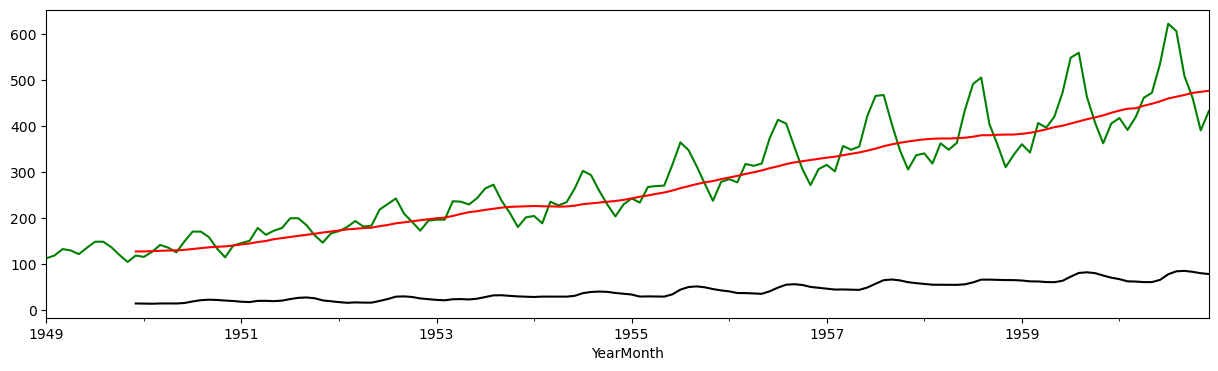

In [16]:
plt.figure(figsize=(15,4))
df["passengers"].plot(c="green")
df["rollMean"].plot(c="red")
df["rollstd"].plot(c="black")
## we see that the variance is stationary but the mean is increasing

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adf=adfuller(df["passengers"], autolag='AIC')

In [19]:
adf

(0.8153688792060655,
 0.9918802434376413,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [20]:

stats=pd.Series(adf[0:4],index=["Test Statistic","p-value","lags used","number of observation used"])

In [21]:
stats

Test Statistic                  0.815369
p-value                         0.991880
lags used                      13.000000
number of observation used    130.000000
dtype: float64

In [22]:
for key,values in adf[4].items():
    print("criticality",key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


In [23]:
stats
## here we see that the data is not stationary,we can convert the data into stationary by diffrencing

Test Statistic                  0.815369
p-value                         0.991880
lags used                      13.000000
number of observation used    130.000000
dtype: float64

## Making data Stationary
there are 3 ways to make the data stationary
1-time shift
2-log
3-square root,cube

In [24]:

## first do the time shift,then do the the log of the data,taking the square root

In [25]:
df.head()

,passengers,rollMean,rollstd
YearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


In [26]:
df.dropna(inplace=True)

In [27]:
df.head()

,passengers,rollMean,rollstd
YearMonth,,,
1949-12-01,118,126.666667,13.720147
1950-01-01,115,126.916667,13.453342
1950-02-01,126,127.583333,13.166475
1950-03-01,141,128.333333,13.686977
1950-04-01,135,128.833333,13.822467


In [28]:
df.head()

,passengers,rollMean,rollstd
YearMonth,,,
1949-12-01,118,126.666667,13.720147
1950-01-01,115,126.916667,13.453342
1950-02-01,126,127.583333,13.166475
1950-03-01,141,128.333333,13.686977
1950-04-01,135,128.833333,13.822467


In [29]:
df["roll mean shift"]=df["rollMean"].shift(12)

In [30]:
df.dropna(inplace=True)

In [31]:
df["difference"]=df["passengers"]-df["roll mean shift"]

In [32]:
df.head()

,passengers,rollMean,rollstd,roll mean shift,difference
YearMonth,,,,,
1950-12-01,140,139.666667,19.070841,126.666667,13.333333
1951-01-01,145,142.166667,17.439940,126.916667,18.083333
1951-02-01,150,144.166667,16.781122,127.583333,22.416667
1951-03-01,178,147.250000,19.349066,128.333333,49.666667
1951-04-01,163,149.583333,19.425655,128.833333,34.166667


In [33]:
adfuller(df["difference"])[1]

0.01353677219344397

In [34]:
if adfuller(df["difference"])[1]<=0.05:
    print("reject the null hypothesis means the data is not stationary")
else:
    print("accept the null hypothesis means the data is not stationary")
    

reject the null hypothesis means the data is not stationary


<AxesSubplot: xlabel='YearMonth'>

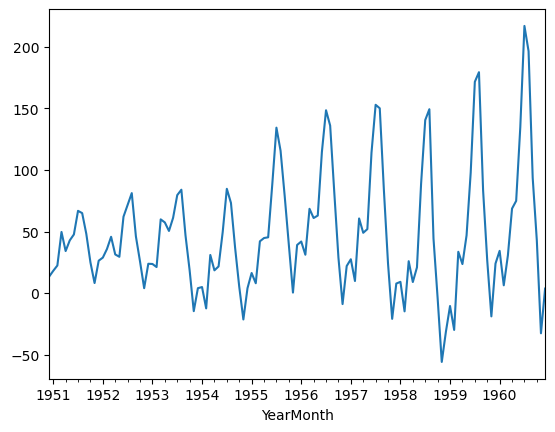

In [35]:
## we convert the data to be stationary ,now we  can see it by plotting the graph
df["difference"].plot()
## stationary-means the mean and the standard deviation should be constant

In [36]:
import matplotlib.pyplot as plt

In [37]:
def test_stationarity(dataFrame,var):
    dataFrame["rollMean"]=dataFrame[var].rolling(window=12).mean()
    dataFrame["rollstd"]=dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest=adfuller(dataFrame[var],autolag="AIC")
    stats=pd.Series(adfTest[0:4],index=["Test statistic","p value","lags used","number of observation used"])
    print(stats)
    
    for key,values in adfTest[4].items():
        print("critically",key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var,label="original")
    sns.lineplot(data=dataFrame,x=dataFrame.index,y="rollMean",label="rollMean")
    sns.lineplot(data=dataFrame,x=dataFrame.index,y="rollstd",label="rollstd")
    plt.legend()
    plt.plot()

Test statistic                  0.650076
p value                         0.988787
lags used                      13.000000
number of observation used    107.000000
dtype: float64
critically 1% : -3.492995948509562
critically 5% : -2.888954648057252
critically 10% : -2.58139291903223


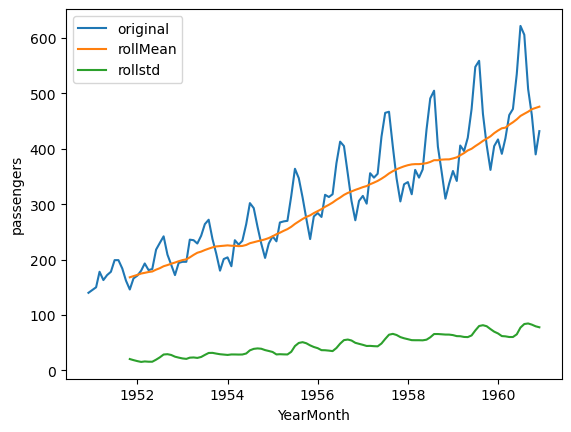

In [38]:
test_stationarity(df,"passengers")

In [39]:
## time shift
air_df=df[["passengers"]]
air_df.head()

,passengers
YearMonth,
1950-12-01,140
1951-01-01,145
1951-02-01,150
1951-03-01,178
1951-04-01,163


In [40]:
## time shift
## shift(1)--shift for one month
air_df["shift"]=air_df["passengers"].shift(1)
air_df["diffrence"]=air_df["passengers"]-air_df["shift"]

/tmp/ipykernel_154/1881742690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df["shift"]=air_df["passengers"].shift(1)
/tmp/ipykernel_154/1881742690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df["diffrence"]=air_df["passengers"]-air_df["shift"]


In [41]:
air_df.head()

,passengers,shift,diffrence
YearMonth,,,
1950-12-01,140,NaN,NaN
1951-01-01,145,140.0,5.0
1951-02-01,150,145.0,5.0
1951-03-01,178,150.0,28.0
1951-04-01,163,178.0,-15.0


In [42]:
air_df.dropna(inplace=True)

/tmp/ipykernel_154/336205149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df.dropna(inplace=True)


/tmp/ipykernel_154/1597197315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollMean"]=dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_154/1597197315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollstd"]=dataFrame[var].rolling(window=12).std()


Test statistic                 -2.469275
p value                         0.123130
lags used                      12.000000
number of observation used    107.000000
dtype: float64
critically 1% : -3.492995948509562
critically 5% : -2.888954648057252
critically 10% : -2.58139291903223


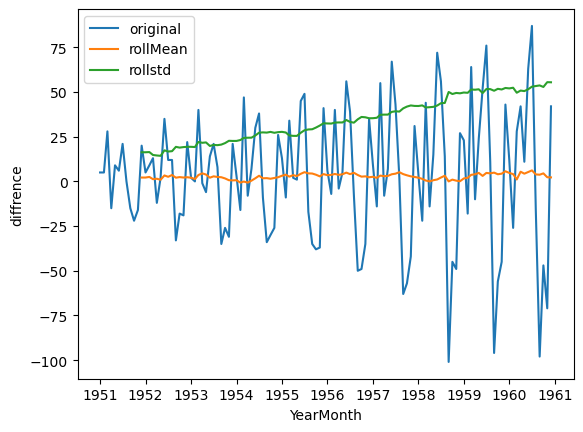

In [43]:
test_stationarity(air_df,"diffrence")
## the mean is seems to be stationary but the standard deviation is showing the little trend

In [44]:
log_df=df[["passengers"]]
log_df["logs"]=np.log(log_df["passengers"])

/tmp/ipykernel_154/3625303734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df["logs"]=np.log(log_df["passengers"])


In [45]:
log_df.head()

,passengers,logs
YearMonth,,
1950-12-01,140,4.941642
1951-01-01,145,4.976734
1951-02-01,150,5.010635
1951-03-01,178,5.181784
1951-04-01,163,5.093750


/tmp/ipykernel_154/1597197315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollMean"]=dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_154/1597197315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollstd"]=dataFrame[var].rolling(window=12).std()


Test statistic                 -0.843903
p value                         0.805885
lags used                      13.000000
number of observation used    107.000000
dtype: float64
critically 1% : -3.492995948509562
critically 5% : -2.888954648057252
critically 10% : -2.58139291903223


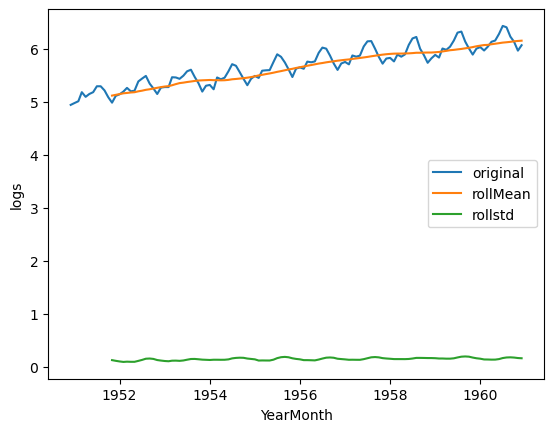

In [46]:
test_stationarity(log_df,"logs")
## the standard deviation is constnat,but the original data and mean is showing some trends

In [47]:
sqrt_df=df[["passengers"]]
sqrt_df["sqrt"]=np.sqrt(df["passengers"])

/tmp/ipykernel_154/2969056005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df["sqrt"]=np.sqrt(df["passengers"])


In [48]:
df.head()

,passengers,rollMean,rollstd,roll mean shift,difference
YearMonth,,,,,
1950-12-01,140,NaN,NaN,126.666667,13.333333
1951-01-01,145,NaN,NaN,126.916667,18.083333
1951-02-01,150,NaN,NaN,127.583333,22.416667
1951-03-01,178,NaN,NaN,128.333333,49.666667
1951-04-01,163,NaN,NaN,128.833333,34.166667


/tmp/ipykernel_154/1597197315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollMean"]=dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_154/1597197315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollstd"]=dataFrame[var].rolling(window=12).std()


Test statistic                 -0.071419
p value                         0.952212
lags used                      13.000000
number of observation used    107.000000
dtype: float64
critically 1% : -3.492995948509562
critically 5% : -2.888954648057252
critically 10% : -2.58139291903223


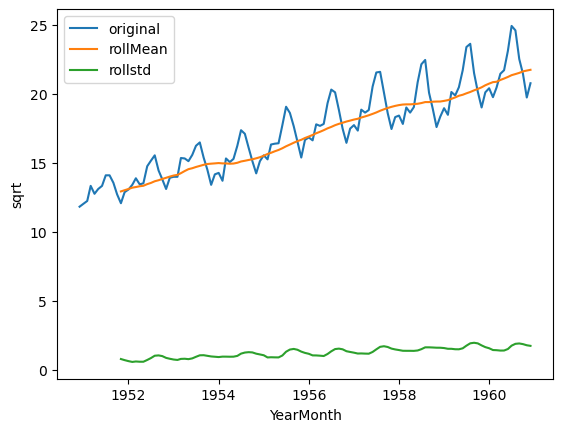

In [49]:
test_stationarity(sqrt_df,"sqrt")

In [50]:
df.head()

,passengers,rollMean,rollstd,roll mean shift,difference
YearMonth,,,,,
1950-12-01,140,NaN,NaN,126.666667,13.333333
1951-01-01,145,NaN,NaN,126.916667,18.083333
1951-02-01,150,NaN,NaN,127.583333,22.416667
1951-03-01,178,NaN,NaN,128.333333,49.666667
1951-04-01,163,NaN,NaN,128.833333,34.166667


In [51]:
cube_rt=df[["passengers"]]
cube_rt["cbrt"]=np.cbrt(df["passengers"])

/tmp/ipykernel_154/548096781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cube_rt["cbrt"]=np.cbrt(df["passengers"])


In [52]:
cube_rt.head()

,passengers,cbrt
YearMonth,,
1950-12-01,140,5.192494
1951-01-01,145,5.253588
1951-02-01,150,5.313293
1951-03-01,178,5.625226
1951-04-01,163,5.462556


/tmp/ipykernel_154/1597197315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollMean"]=dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_154/1597197315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollstd"]=dataFrame[var].rolling(window=12).std()


Test statistic                 -0.333991
p value                         0.920550
lags used                      13.000000
number of observation used    107.000000
dtype: float64
critically 1% : -3.492995948509562
critically 5% : -2.888954648057252
critically 10% : -2.58139291903223


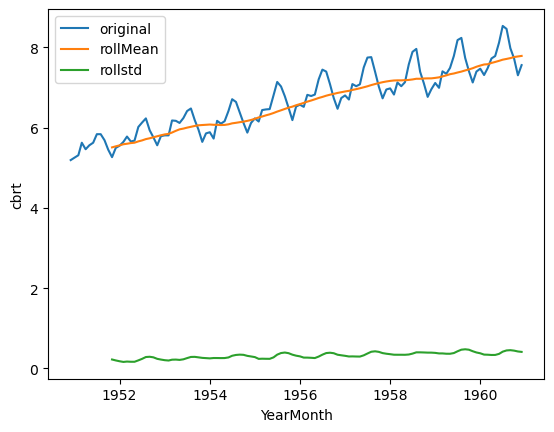

In [53]:
test_stationarity(cube_rt,"cbrt")
## the variance seems to be constant but the mean and orignal data shows the trends

In [54]:
log_sqrt=df[["passengers"]]
log_sqrt["logsqrt"]=np.sqrt(np.log(log_sqrt["passengers"]))

/tmp/ipykernel_154/3047358236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt["logsqrt"]=np.sqrt(np.log(log_sqrt["passengers"]))


In [55]:
log_sqrt.head()

,passengers,logsqrt
YearMonth,,
1950-12-01,140,2.222981
1951-01-01,145,2.230859
1951-02-01,150,2.238445
1951-03-01,178,2.276353
1951-04-01,163,2.256934


/tmp/ipykernel_154/1597197315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollMean"]=dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_154/1597197315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollstd"]=dataFrame[var].rolling(window=12).std()


Test statistic                 -0.968943
p value                         0.764422
lags used                      13.000000
number of observation used    107.000000
dtype: float64
critically 1% : -3.492995948509562
critically 5% : -2.888954648057252
critically 10% : -2.58139291903223


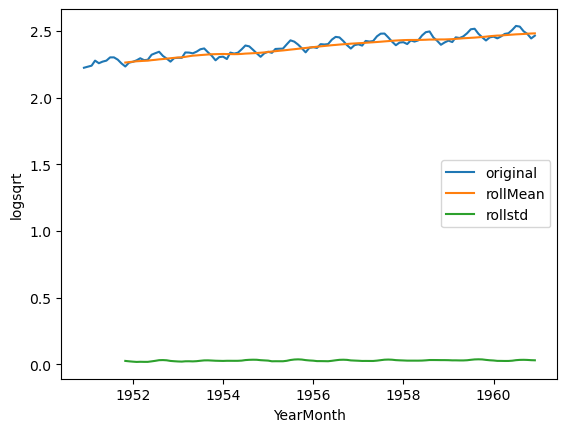

In [56]:
test_stationarity(log_sqrt,"logsqrt")

In [57]:
log_sqrt["shift_logsqrt"]=log_sqrt["logsqrt"].shift(1)

In [58]:
log_sqrt["diffrence"]=log_sqrt["logsqrt"]-log_sqrt["shift_logsqrt"]

In [59]:
log_sqrt.head()

,passengers,logsqrt,rollMean,rollstd,shift_logsqrt,diffrence
YearMonth,,,,,,
1950-12-01,140,2.222981,NaN,NaN,NaN,NaN
1951-01-01,145,2.230859,NaN,NaN,2.222981,0.007879
1951-02-01,150,2.238445,NaN,NaN,2.230859,0.007585
1951-03-01,178,2.276353,NaN,NaN,2.238445,0.037908
1951-04-01,163,2.256934,NaN,NaN,2.276353,-0.019419


In [60]:
log_sqrt.dropna(inplace=True)

In [61]:
log_sqrt.head()

,passengers,logsqrt,rollMean,rollstd,shift_logsqrt,diffrence
YearMonth,,,,,,
1951-11-01,146,2.232399,2.261980,0.026823,2.255570,-0.023171
1951-12-01,166,2.260971,2.265146,0.023883,2.232399,0.028571
1952-01-01,171,2.267524,2.268201,0.021304,2.260971,0.006553
1952-02-01,180,2.278806,2.271565,0.019267,2.267524,0.011282
1952-03-01,193,2.294055,2.273040,0.020316,2.278806,0.015249


Test statistic                -2.575807
p value                        0.098101
lags used                     12.000000
number of observation used    97.000000
dtype: float64
critically 1% : -3.4996365338407074
critically 5% : -2.8918307730370025
critically 10% : -2.5829283377617176


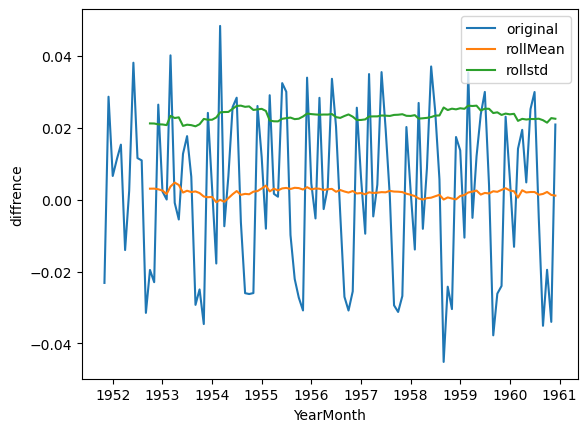

In [62]:
test_stationarity(log_sqrt,"diffrence")
## the mean and the stansard  deviation seems to be constant but the original one looks to be like seasonal

In [63]:
log_sqrt_shift=df[["passengers"]]
log_sqrt_shift["logsqrtshift"]=np.log(np.log(log_sqrt_shift["passengers"]))
log_sqrt_shift["shift1"]=log_sqrt_shift["logsqrtshift"].shift(1)
log_sqrt_shift["diffrence"]=log_sqrt_shift["logsqrtshift"]-log_sqrt_shift["shift1"]

/tmp/ipykernel_154/105642601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_shift["logsqrtshift"]=np.log(np.log(log_sqrt_shift["passengers"]))
/tmp/ipykernel_154/105642601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_shift["shift1"]=log_sqrt_shift["logsqrtshift"].shift(1)
/tmp/ipykernel_154/105642601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [64]:
log_sqrt_shift.head()

,passengers,logsqrtshift,shift1,diffrence
YearMonth,,,,
1950-12-01,140,1.597698,NaN,NaN
1951-01-01,145,1.604774,1.597698,0.007076
1951-02-01,150,1.611563,1.604774,0.006789
1951-03-01,178,1.645149,1.611563,0.033587
1951-04-01,163,1.628014,1.645149,-0.017135


In [65]:
log_sqrt_shift.dropna(inplace=True)

/tmp/ipykernel_154/310969149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_shift.dropna(inplace=True)


In [66]:
log_sqrt_shift.head()
## there is no null so we can do the stationarity test

,passengers,logsqrtshift,shift1,diffrence
YearMonth,,,,
1951-01-01,145,1.604774,1.597698,0.007076
1951-02-01,150,1.611563,1.604774,0.006789
1951-03-01,178,1.645149,1.611563,0.033587
1951-04-01,163,1.628014,1.645149,-0.017135
1951-05-01,172,1.638510,1.628014,0.010496


/tmp/ipykernel_154/1597197315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollMean"]=dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_154/1597197315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["rollstd"]=dataFrame[var].rolling(window=12).std()


Test statistic                 -3.110565
p value                         0.025781
lags used                      13.000000
number of observation used    106.000000
dtype: float64
critically 1% : -3.4936021509366793
critically 5% : -2.8892174239808703
critically 10% : -2.58153320754717


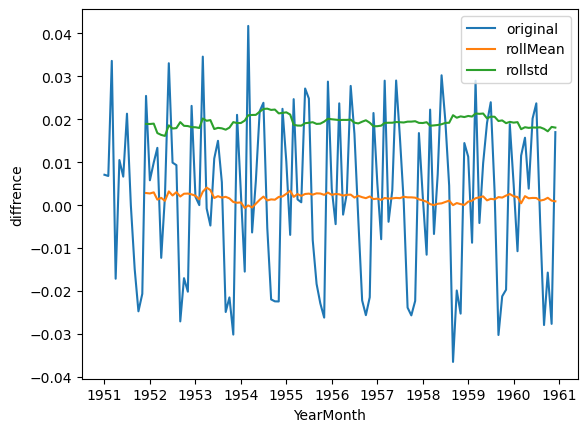

In [67]:
test_stationarity(log_sqrt_shift,"diffrence")

In [68]:
## in the above we found the p value is 0.02 that is less than 0.05 ,we can reject the null hypothesis mean now our data is stationary

## NEXT 2(MAKE THE ARIMA MODEL)

In [69]:
df.head()

,passengers,rollMean,rollstd,roll mean shift,difference
YearMonth,,,,,
1950-12-01,140,NaN,NaN,126.666667,13.333333
1951-01-01,145,NaN,NaN,126.916667,18.083333
1951-02-01,150,NaN,NaN,127.583333,22.416667
1951-03-01,178,NaN,NaN,128.333333,49.666667
1951-04-01,163,NaN,NaN,128.833333,34.166667


In [70]:
airp=df[["passengers"]].copy(deep=True)

In [71]:
airp.head()

,passengers
YearMonth,
1950-12-01,140
1951-01-01,145
1951-02-01,150
1951-03-01,178
1951-04-01,163


In [76]:
airp["shif1"]=airp["passengers"].shift(1)
airp["difference"]=airp["passengers"]-airp["shif1"]
airp.dropna(inplace=True)
airp["seasonal diffrence"]=airp["passengers"]-airp["passengers"].shift(12)

In [78]:
airp

,passengers,shif1,difference,seasonal diffrence
YearMonth,,,,
1951-02-01,150,145.0,5.0,NaN
1951-03-01,178,150.0,28.0,NaN
1951-04-01,163,178.0,-15.0,NaN
1951-05-01,172,163.0,9.0,NaN
1951-06-01,178,172.0,6.0,NaN
1951-07-01,199,178.0,21.0,NaN
1951-08-01,199,199.0,0.0,NaN
1951-09-01,184,199.0,-15.0,NaN
1951-10-01,162,184.0,-22.0,NaN


## Build the ARIMA MODEL

In [ ]:
## we can pass the diffrent paraameter such as the valuee of p,d,q inside the arima model

In [80]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

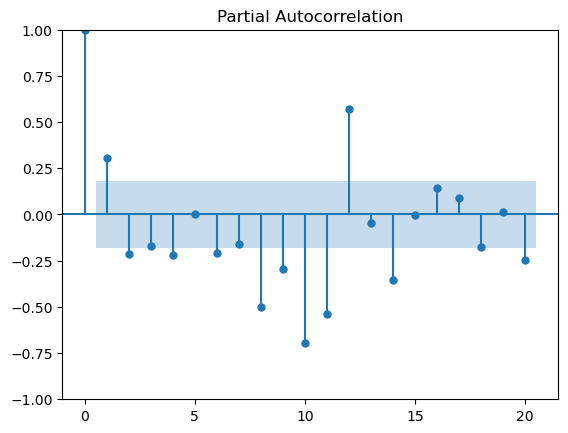

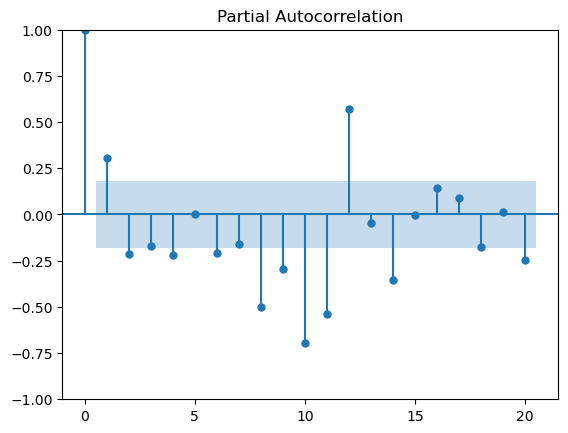

In [83]:
plot_pacf(airp["difference"],lags=20)

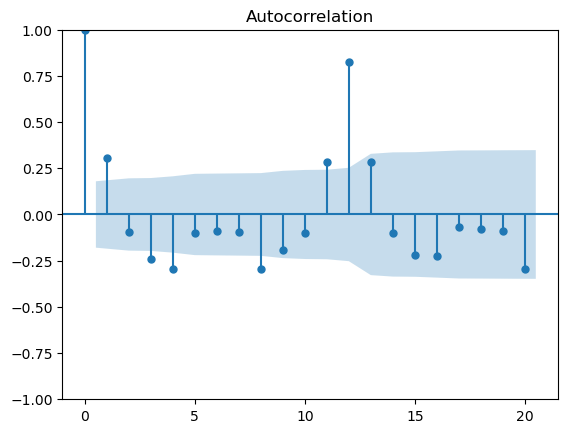

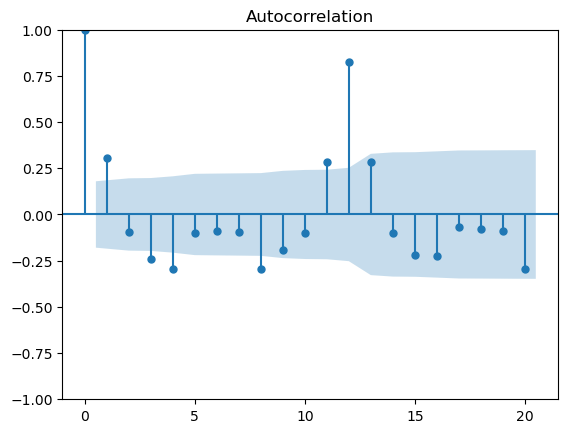

In [84]:
plot_acf(airp["difference"].dropna(),lags=20)

In [85]:
## p = 1,q =3 ,d =1

In [86]:
## Split the data into training data and testing data

In [87]:
len(airp)

119

In [97]:
train=airp[:round(len(airp)*70/100)]
test=airp[round(len(airp)*70/100):]

In [99]:
train.shape,test.shape

((83, 4), (36, 4))

In [117]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming train is a DataFrame with a column named 'passengers'
model = ARIMA(train['passengers'], order=(1, 1, 3))
model_fit = model.fit()
start_index = test.index[0]
end_index = test.index[-1]

predictions = model_fit.predict(start=start_index, end=end_index)
airp["arima_pred"]=predictions
airp.head()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,shif1,difference,seasonal diffrence,arima_pred
YearMonth,,,,,
1951-02-01,150,145.0,5.0,NaN,NaN
1951-03-01,178,150.0,28.0,NaN,NaN
1951-04-01,163,178.0,-15.0,NaN,NaN
1951-05-01,172,163.0,9.0,NaN,NaN
1951-06-01,178,172.0,6.0,NaN,NaN


In [118]:
airp.tail(10)

,passengers,shif1,difference,seasonal diffrence,arima_pred
YearMonth,,,,,
1960-03-01,419,391.0,28.0,13.0,361.728911
1960-04-01,461,419.0,42.0,65.0,361.728911
1960-05-01,472,461.0,11.0,52.0,361.728910
1960-06-01,535,472.0,63.0,63.0,361.728910
1960-07-01,622,535.0,87.0,74.0,361.728910
1960-08-01,606,622.0,-16.0,47.0,361.728910
1960-09-01,508,606.0,-98.0,45.0,361.728910
1960-10-01,461,508.0,-47.0,54.0,361.728910
1960-11-01,390,461.0,-71.0,28.0,361.728910


<AxesSubplot: xlabel='YearMonth'>

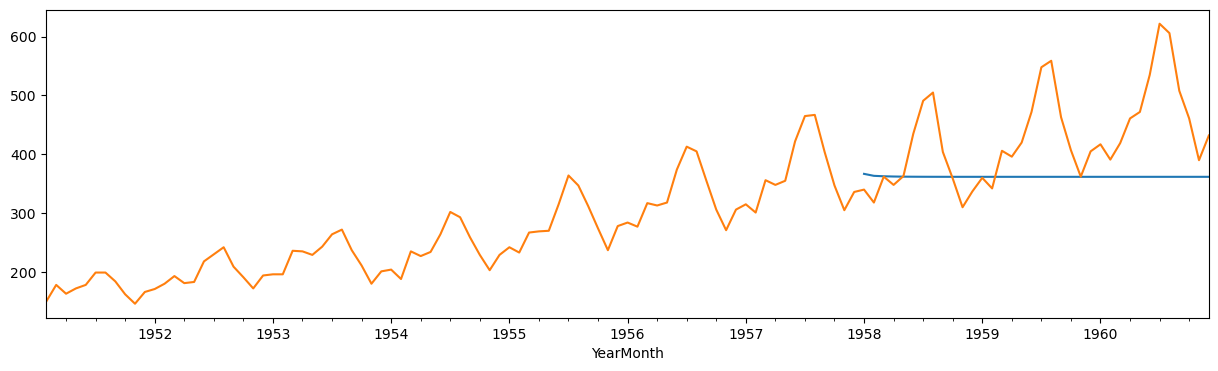

In [121]:
airp.dropna()
plt.figure(figsize=(15,4))
airp.arima_pred.plot()
airp.passengers.plot()
## Here the predictions does not give the good result--Arima does not work properly in this case

In [124]:
from  sklearn.metrics import mean_squared_error

In [126]:
np.sqrt(mean_squared_error(test["passengers"],predictions))

102.8898846903104

In [127]:
## Here we want to craete a seasonal arima model

In [128]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [131]:
airp.head()

,passengers,shif1,difference,seasonal diffrence,arima_pred
YearMonth,,,,,
1951-02-01,150,145.0,5.0,NaN,NaN
1951-03-01,178,150.0,28.0,NaN,NaN
1951-04-01,163,178.0,-15.0,NaN,NaN
1951-05-01,172,163.0,9.0,NaN,NaN
1951-06-01,178,172.0,6.0,NaN,NaN


In [136]:
airp["arima_pred"].dropna(inplace =True)

In [138]:
airp.isnull().sum()

passengers             0
shif1                  0
difference             0
seasonal diffrence    12
arima_pred            83
dtype: int64

In [141]:
airp["arima_pred"].dropna(inplace=True)

In [142]:
airp.head()

,passengers,shif1,difference,seasonal diffrence,arima_pred
YearMonth,,,,,
1951-02-01,150,145.0,5.0,NaN,NaN
1951-03-01,178,150.0,28.0,NaN,NaN
1951-04-01,163,178.0,-15.0,NaN,NaN
1951-05-01,172,163.0,9.0,NaN,NaN
1951-06-01,178,172.0,6.0,NaN,NaN


In [144]:
airp.dropna(inplace=True)

In [145]:
airp.isnull().sum()

passengers            0
shif1                 0
difference            0
seasonal diffrence    0
arima_pred            0
dtype: int64

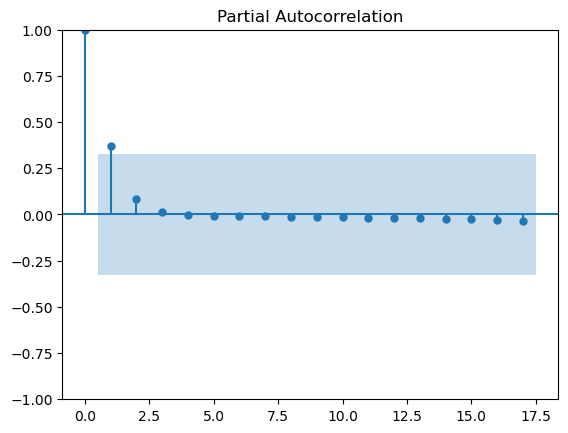

In [151]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Assuming 'airp' is your DataFrame and 'arima_pred' is a column in it
# airp = pd.DataFrame(...)

# Dropping NaN values from 'arima_pred'
data = airp["arima_pred"].dropna()

# Determine the maximum allowed lags
max_lags = min(20, (len(data) // 2) - 1)

# Plot PACF with the appropriate number of lags
plot_pacf(data, lags=max_lags)
plt.show()

In [153]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [155]:
model=SARIMAX(train["passengers"],order=(1,1,3),seasonal_order=(1,1,3,12))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [159]:
## then we want to fit the model
model_fit=model.fit()
start_index = test.index[0]
end_index = test.index[-1]

predictions = model_fit.predict(start=start_index, end=end_index)
airp["sarimax_pred"]=predictions

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14613D+00    |proj g|=  1.18444D-01

At iterate    5    f=  3.11570D+00    |proj g|=  4.21853D-02

At iterate   10    f=  3.09935D+00    |proj g|=  3.90388D-02

At iterate   15    f=  3.08964D+00    |proj g|=  8.77916D-03

At iterate   20    f=  3.08832D+00    |proj g|=  1.69603D-02

At iterate   25    f=  3.08764D+00    |proj g|=  1.59395D-03

At iterate   30    f=  3.08755D+00    |proj g|=  2.59987D-03

At iterate   35    f=  3.08747D+00    |proj g|=  1.22122D-03

At iterate   40    f=  3.08739D+00    |proj g|=  1.62113D-03

At iterate   45    f=  3.08737D+00    |proj g|=  1.28861D-04


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.08736D+00    |proj g|=  5.80767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   5.808D-04   3.087D+00
  F =   3.0873649485431014     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [161]:
airp.tail()

,passengers,shif1,difference,seasonal diffrence,arima_pred,sarimax_pred
YearMonth,,,,,,
1960-08-01,606,622.0,-16.0,47.0,361.72891,628.461934
1960-09-01,508,606.0,-98.0,45.0,361.72891,556.507253
1960-10-01,461,508.0,-47.0,54.0,361.72891,485.320601
1960-11-01,390,461.0,-71.0,28.0,361.72891,433.989561
1960-12-01,432,390.0,42.0,27.0,361.72891,476.986599


In [162]:
airp.dropna(inplace=True)

In [163]:
airp.head()

,passengers,shif1,difference,seasonal diffrence,arima_pred,sarimax_pred
YearMonth,,,,,,
1958-01-01,340,336.0,4.0,25.0,366.757469,351.280084
1958-02-01,318,340.0,-22.0,17.0,363.415780,334.572283
1958-03-01,362,318.0,44.0,6.0,362.663283,392.030564
1958-04-01,348,362.0,-14.0,0.0,362.246468,390.461377
1958-05-01,363,348.0,15.0,8.0,362.015590,395.466706


<AxesSubplot: xlabel='YearMonth'>

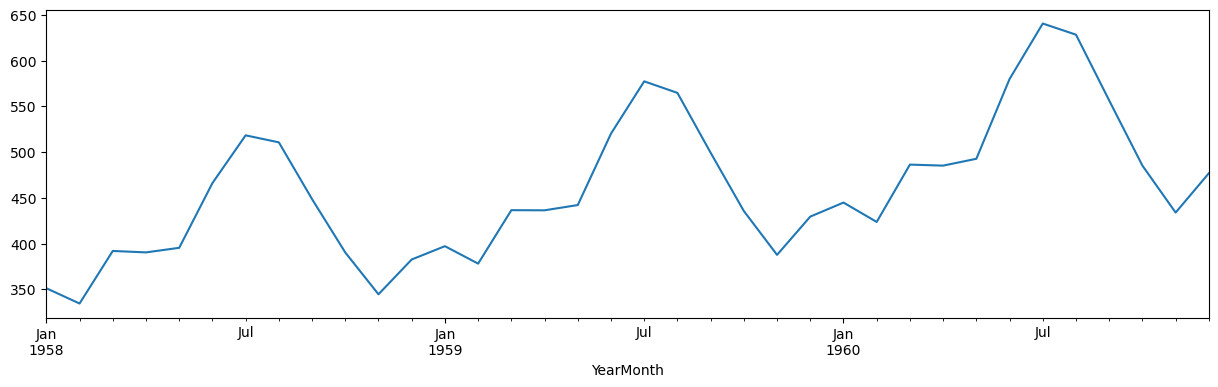

In [166]:
plt.figure(figsize=(15,4))
airp["sarimax_pred"].plot()
## here th